In [1]:
# Import libraries
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
library(ggplot2)
library(data.table)
library(tidyverse)
library(dplyr)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------

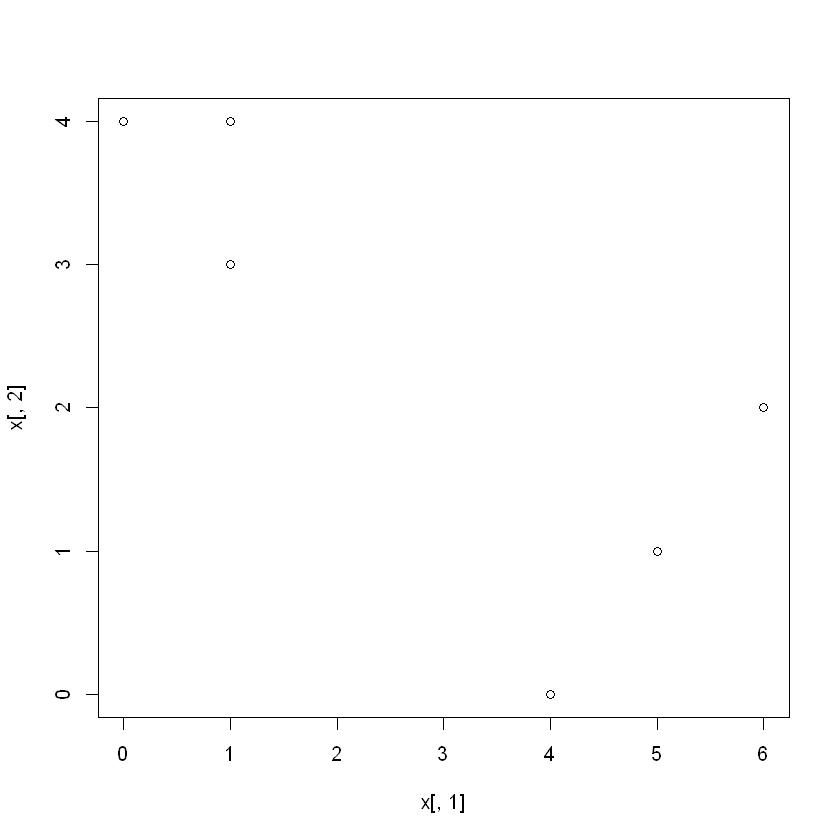

In [2]:
#Chapter 3
#part a
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(x[,1], x[,2])

In [3]:
#part b
set.seed(1)
labels <- sample(2, nrow(x), replace = T)

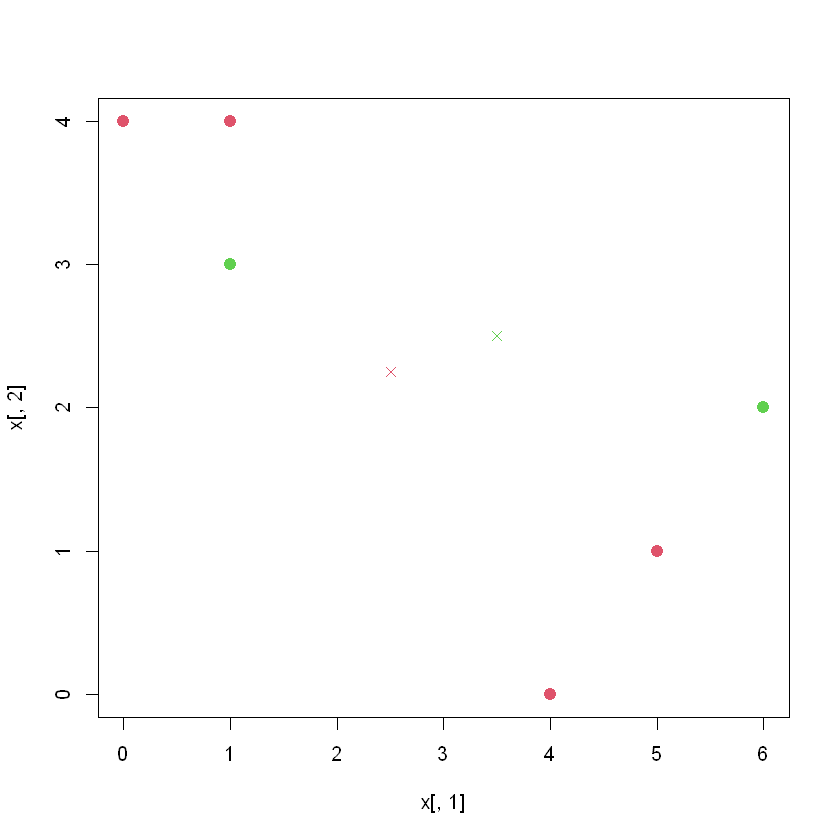

In [4]:
#part c
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

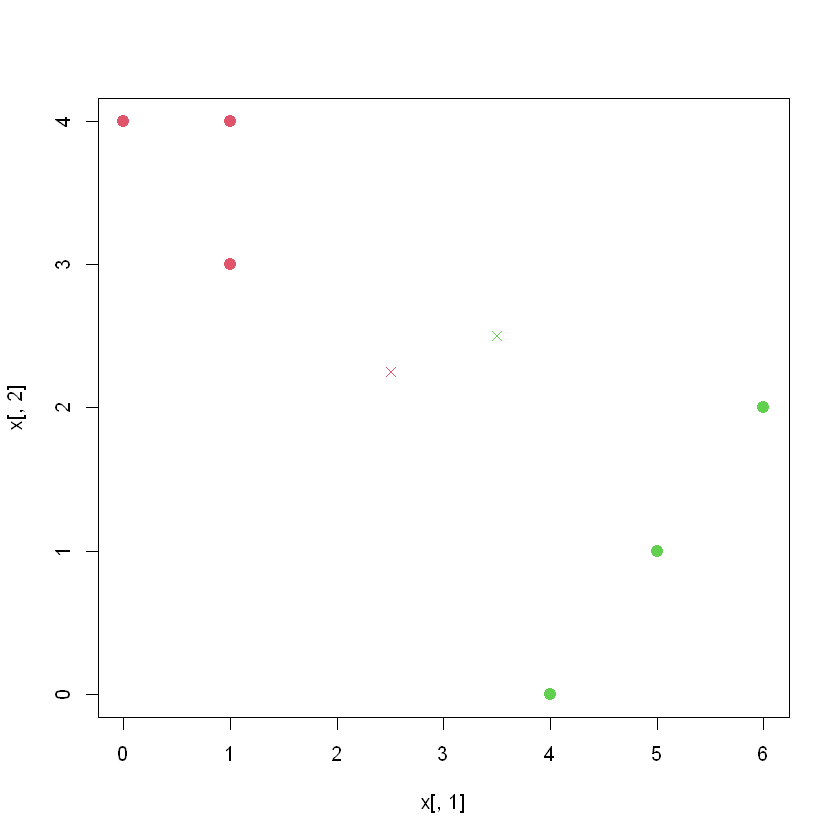

In [5]:
#part d
labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

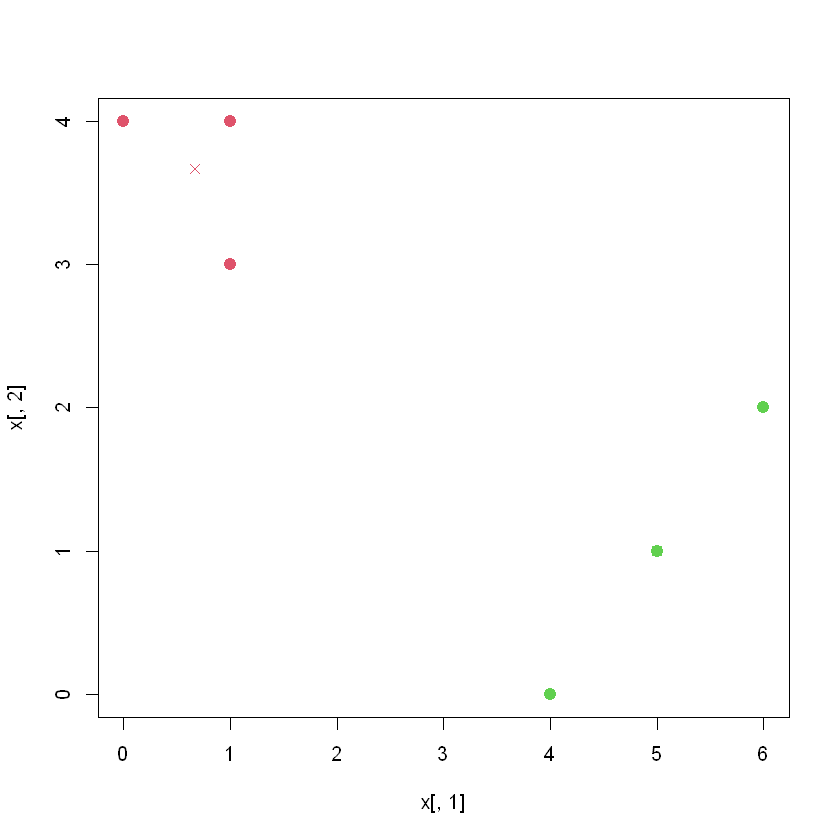

In [6]:
#part e
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

Chapter 4
Part b
They fuse at the same height for single and complete linkage

In [7]:
# Question 8
# part a
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [8]:
# part b
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

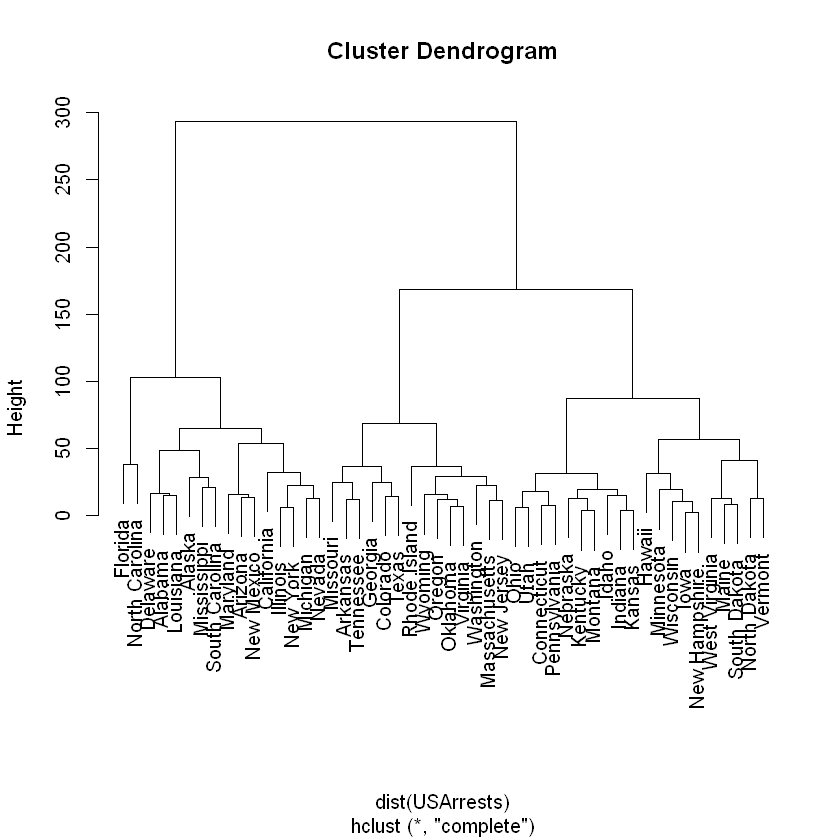

In [9]:
# Question 9
# part a
set.seed(123)
hc.complete <- hclust(dist(USArrests), method = "complete")
plot(hc.complete)

In [10]:
a <- data.frame(cutree(hc.complete, 3))
a

,cutree.hc.complete..3.
,<int>
Alabama,1
Alaska,1
Arizona,1
Arkansas,2
California,1
Colorado,2
Connecticut,3
Delaware,1
Florida,1


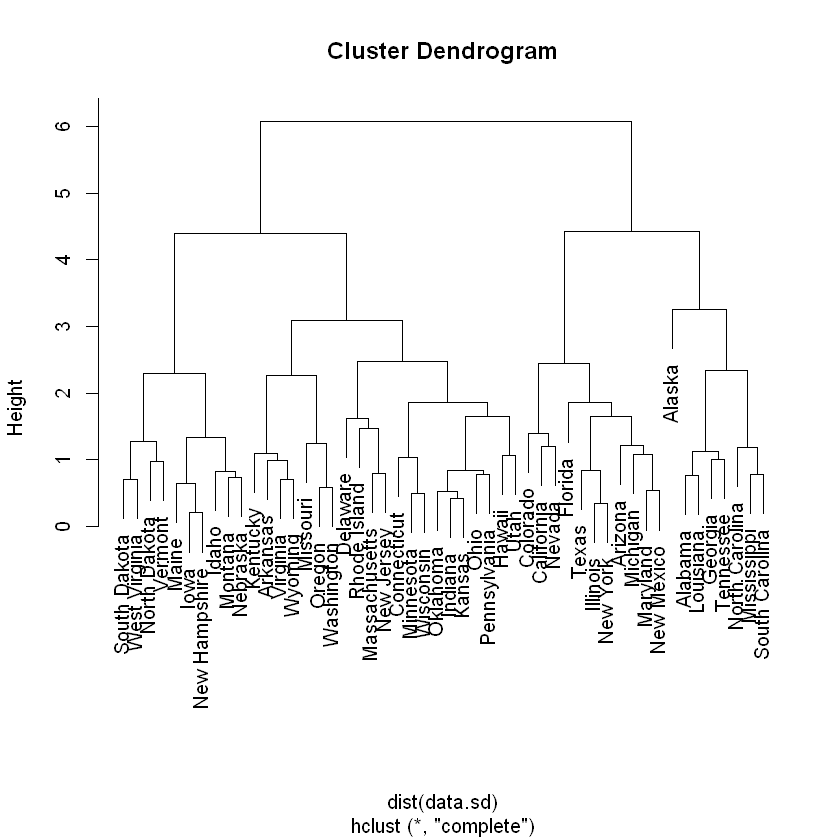

In [11]:
# part c
data.sd <- scale(USArrests)
hc.sd.complete <- hclust(dist(data.sd), method = "complete")
plot(hc.sd.complete)

In [12]:
# part d
b <- data.frame(cutree(hc.sd.complete, 3))
b

,cutree.hc.sd.complete..3.
,<int>
Alabama,1
Alaska,1
Arizona,2
Arkansas,3
California,2
Colorado,2
Connecticut,3
Delaware,3
Florida,2


In [13]:
data.frame(table(cutree(hc.complete, 3),cutree(hc.sd.complete, 3)))

Var1,Var2,Freq
<fct>,<fct>,<int>
1,1,6
2,1,2
3,1,0
1,2,9
2,2,2
3,2,0
1,3,1
2,3,10
3,3,20


In [14]:
# Question 10
set.seed(123)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

In [15]:
# part b
pr.out <- prcomp(x)
summary(pr.out)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5823 0.001858 0.001718 0.001669 0.001658
Proportion of Variance 0.750 0.2500 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001627 0.001542 0.001463 0.001408 0.001356 0.001313
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.001284 0.001257 0.001202 0.001139 0.001129 0.001104
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999990 0.999990 0.999990 0.999990 0.999990 0.999990
                           PC19     PC20     PC21      PC22      PC23 

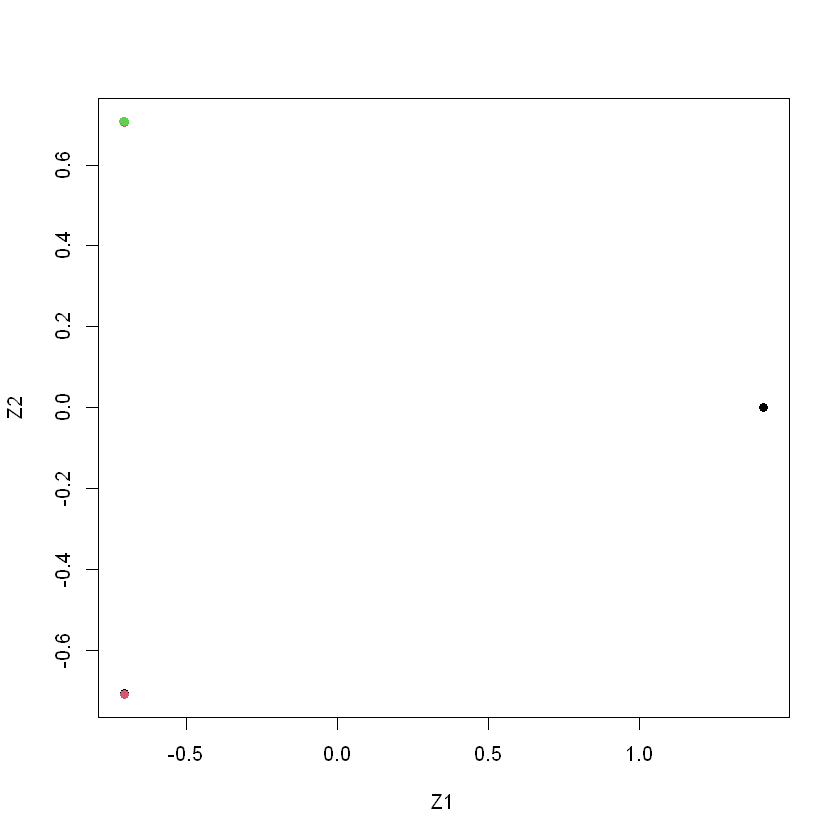

In [16]:
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 16)

In [17]:
# part c
labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))
km.out <- kmeans(x, 3, nstart = 20)
table(labels, km.out$cluster)

      
labels  1  2  3
     1  0 20  0
     2 20  0  0
     3  0  0 20

In [18]:
# part d
km.out <- kmeans(x, 2, nstart = 20)
table(labels, km.out$cluster)

      
labels  1  2
     1  0 20
     2 20  0
     3  0 20

In [19]:
# part e
km.out <- kmeans(x, 4, nstart = 20)
table(labels, km.out$cluster)

      
labels  1  2  3  4
     1 20  0  0  0
     2  0 20  0  0
     3  0  0 11  9

In [20]:
# part f
km.out <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(labels, km.out$cluster)

      
labels  1  2  3
     1 20  0  0
     2  0  0 20
     3  0 20  0

In [21]:
# part g
km.out <- kmeans(scale(x), 3, nstart = 20)
km.out$cluster

[1] 3 3 1 1 3 1 1 1 1 1 3 1 3 3 3 2 1 3 2 1 2 3 1 1 1 2 2 2 1 3 2 2 1 2 2 3 2 3
[39] 2 2 1 1 1 2 1 3 1 1 3 1 2 3 3 2 1 1 1 3 3 1